## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Data

In [2]:
# Import a CSV file
# Survival = 0 (No), 1 (Yes)

data = pd.read_csv('titanic_train.csv')

In [3]:
# Display First 5 rows

data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Drop unwanted columns

new_data = data.drop(['PassengerId','Name','Ticket'], axis = 1)
new_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


## Check for Missing Data

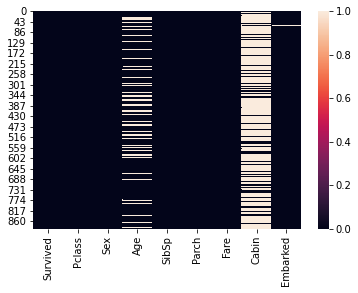

In [5]:
sns.heatmap(new_data.isnull())

In [6]:
# We can drop also the Cabin Column

new_data = new_data.drop('Cabin', axis = 1)

In [7]:
# We still has missing age values

new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [8]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## Data Cleaning

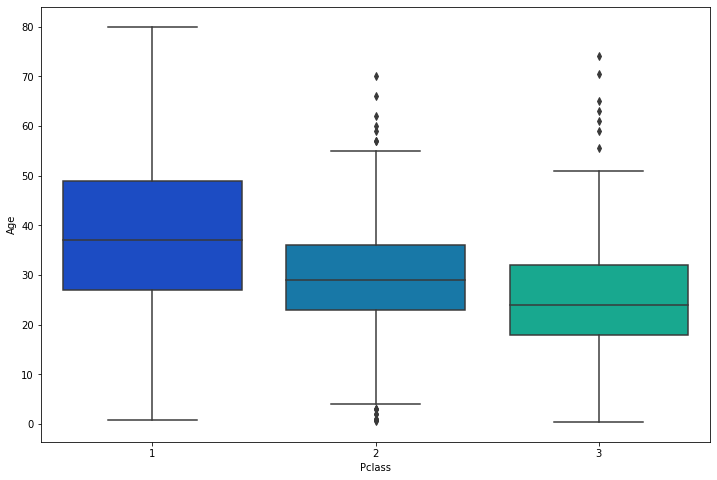

In [9]:
# Let us fill the missing age data using a mean based from the Pclass
# Visualize First

plt.figure(figsize = (12,8))
sns.boxplot(x = 'Pclass', y = 'Age', data = new_data, palette = 'winter')

In [10]:
# Based on the plot Pclass 1 = 37, Pclass 2 = 29, Pclass 3 = 24
# Let us create a function to fill in this values

def impute_age(cols):

  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):

    if Pclass == 1:

      return 37

    elif Pclass == 2:

      return 29

    else:

      return 24
  
  else:

    return Age

In [11]:
# Apply the function we created

new_data['Age'] = new_data[['Age', 'Pclass']].apply(impute_age, axis = 1)

In [12]:
# Check the columns info again

new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


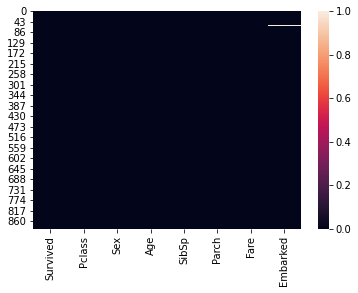

In [13]:
# Or use the heatmap again

sns.heatmap(new_data.isnull())

In [14]:
# It will not hurt to drop 2 rows of data with missing Embarked values

new_data.dropna(inplace = True)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


## Converting Categorical Features

In [15]:
# Notice the Sex Column has 'Male' and 'Female'
# Manual Label Encoding using replace

sex_encoding = new_data['Sex'].replace(['male','female'],[0,1]).rename('Sex_Encoded')
embarked_encoding = new_data['Embarked'].replace(['S','C','Q'],[0,1,2]).rename('Embarked_Encoded')

In [16]:
# Concatenate the new column to your existing dataframe

new_data = pd.concat([new_data, sex_encoding, embarked_encoding], axis = 1)
new_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_Encoded,Embarked_Encoded
0,0,3,male,22.0,1,0,7.2500,S,0,0
1,1,1,female,38.0,1,0,71.2833,C,1,1
2,1,3,female,26.0,0,0,7.9250,S,1,0
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0,0
887,1,1,female,19.0,0,0,30.0000,S,1,0
888,0,3,female,24.0,1,2,23.4500,S,1,0
889,1,1,male,26.0,0,0,30.0000,C,0,1


In [17]:
# Drop the Categorical Sex Column

new_data.drop(['Sex','Embarked'], axis = 1, inplace = True)
new_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Encoded,Embarked_Encoded
0,0,3,22.0,1,0,7.2500,0,0
1,1,1,38.0,1,0,71.2833,1,1
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0
887,1,1,19.0,0,0,30.0000,1,0
888,0,3,24.0,1,2,23.4500,1,0
889,1,1,26.0,0,0,30.0000,0,1


## EDA (Better to Understand the Data First)

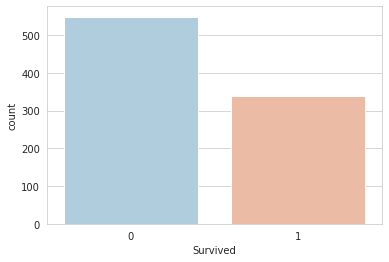

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data = new_data, palette='RdBu_r')

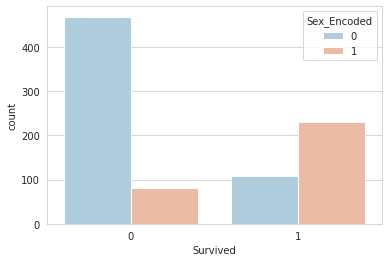

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex_Encoded',data=new_data,palette='RdBu_r') # 0 = 'Male', 1 = 'Female'

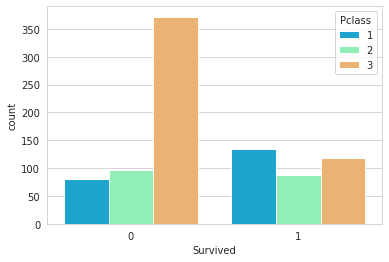

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data = new_data,palette='rainbow') # Class 1 is Expensive

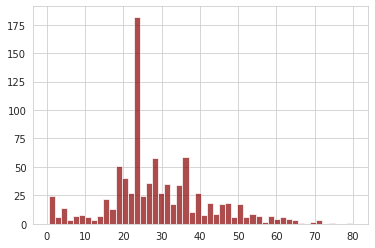

In [21]:
new_data['Age'].hist(bins=50,color='darkred',alpha=0.7)

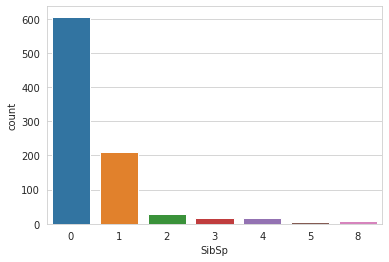

In [22]:
sns.countplot(x='SibSp',data = new_data)

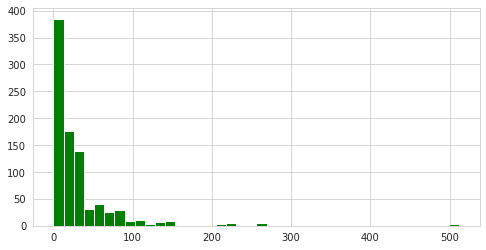

In [23]:
new_data['Fare'].hist(color='green',bins=40,figsize=(8,4))

## Build a Logistic Regression Model

In [24]:
# Train and Test Split

from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(new_data.drop('Survived',axis=1), new_data['Survived'], test_size=0.30, random_state=101)

In [26]:
# Model Fitting

from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# Predictions

predictions = model.predict(X_test)

## Evaluate the Model

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

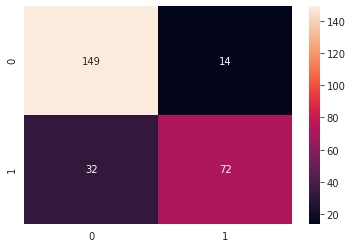

In [30]:
# Confusion Matrix

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d")

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       163
           1       0.84      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



In [32]:
new_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Encoded,Embarked_Encoded
0,0,3,22.0,1,0,7.2500,0,0
1,1,1,38.0,1,0,71.2833,1,1
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,0
887,1,1,19.0,0,0,30.0000,1,0
888,0,3,24.0,1,2,23.4500,1,0
889,1,1,26.0,0,0,30.0000,0,1


In [33]:
# Testing of Prediction

unseen_predictions = model.predict([[1,40,1,0,150,0,3]])
unseen_predictions

array([1])